In [2]:
import random
import math
import matplotlib.pyplot as plt

In [3]:
random.seed(44)
#inspired from knapsack ga

num_cities = 20
cities = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_cities)]

population_size = 100
generations = 500
mutation_rate = 0.3

In [4]:
def distance(city1, city2):
    # distance between two cities
    x_dist = city1[0] - city2[0]
    y_dist = city1[1] - city2[1]
    return math.sqrt(x_dist ** 2 + y_dist ** 2)

def create_individual():
    # random permutation of city indices
    path = list(range(num_cities))
    random.shuffle(path)
    return path

def calculate_total_distance(individual):
    # total distance of the path
    total = 0
    for i in range(len(individual)):
        current_city_idx = individual[i]
        next_city_idx = individual[(i + 1) % len(individual)]

        total += distance(cities[current_city_idx], cities[next_city_idx])
    return total

def selection(population):
    # tournament selection returning the one with lower distance
    parent1 = random.choice(population)
    parent2 = random.choice(population)

    dist1 = calculate_total_distance(parent1)
    dist2 = calculate_total_distance(parent2)

    return parent1 if dist1 < dist2 else parent2


In [5]:
def crossover(parent1, parent2):
    #crossover function
    # crossover point
    point = random.randint(1, len(parent1) - 1)

    child = parent1[:point]

    # for parent 2, since we cannot append the parent's half in tsp, we appended the remaining ones one byone
    for city in parent2:
        if city not in child:
            child.append(city)

    return child

def mutate(individual):
    # swap mutation
    if random.random() < mutation_rate:
        idx1 = random.randint(0, len(individual) - 1)
        idx2 = random.randint(0, len(individual) - 1)


        temp = individual[idx1]
        individual[idx1] = individual[idx2]
        individual[idx2] = temp

    return individual

In [6]:
population = [create_individual() for _ in range(population_size)]

history = []

for gen in range(generations):
    # sorting by distance
    population = sorted(population, key=lambda x: calculate_total_distance(x))

    best_dist = calculate_total_distance(population[0])
    history.append(best_dist)

    if gen % 50 == 0:
        print(f"generation {gen} best distance {best_dist:.2f}")

    # next generation
    new_population = [population[0]]  # the best individual

    while len(new_population) < population_size:
        p1 = selection(population)
        p2 = selection(population)
        child = crossover(p1, p2)
        child = mutate(child)
        new_population.append(child)

    population = new_population

best_solution = sorted(population, key=lambda x: calculate_total_distance(x))[0]
final_dist = calculate_total_distance(best_solution)

generation 0 best distance 840.52
generation 50 best distance 520.65
generation 100 best distance 460.55
generation 150 best distance 457.86
generation 200 best distance 381.57
generation 250 best distance 355.15
generation 300 best distance 355.15
generation 350 best distance 355.15
generation 400 best distance 355.15
generation 450 best distance 355.15


Result
Best Path: [13, 10, 8, 9, 19, 6, 18, 3, 4, 5, 17, 7, 2, 15, 14, 0, 11, 16, 12, 1]
Distance: 355.15


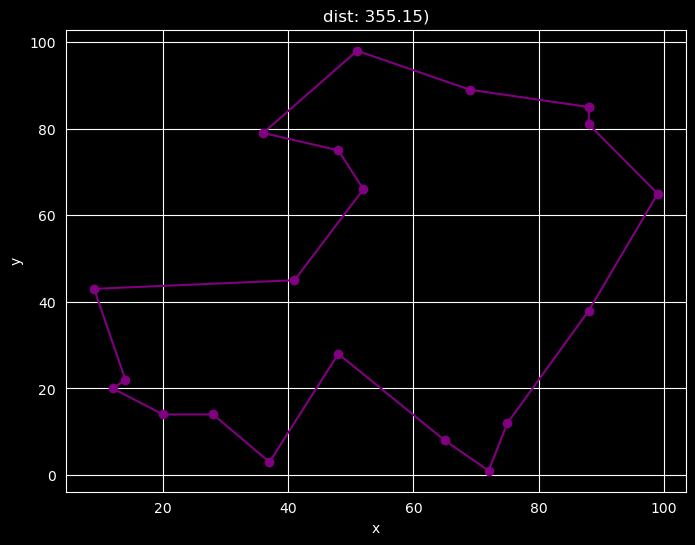

In [7]:
print("Result")
print(f"Best Path: {best_solution}")
print(f"Distance: {final_dist:.2f}")

x_coords = []
y_coords = []

for city_idx in best_solution:
    x_coords.append(cities[city_idx][0])
    y_coords.append(cities[city_idx][1])

x_coords.append(cities[best_solution[0]][0])
y_coords.append(cities[best_solution[0]][1])

plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, 'o-', color='purple')
plt.title(f"dist: {final_dist:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

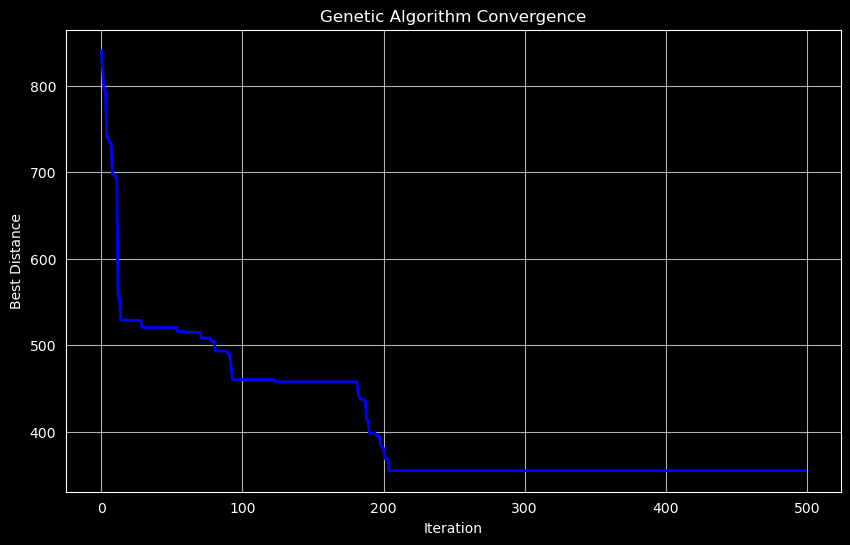

In [8]:
# iteration vs distance plot
plt.figure(figsize=(10, 6))

plt.plot(range(len(history)), history, color='blue', linewidth=2)

plt.title("Genetic Algorithm Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Distance")
plt.grid(True, alpha=0.7)

plt.show()